# UFO Sightings in California - A Brief Investigation

## Introduction:

Ah yes, UFOs. I remember the day when I first saw War of the Worlds. I must have been 12. I'll never forget it. There was a period in my life where I was so captivated by that movie that I actually kept on replaying the DVD copy I had on loop for breakfast, lunch and dinner. I replayed this movie so much that my Dad got concerned by the fact that Tom Cruise's face was always on the Television screen. Anyways.

This investigation does not comprise Tom Cruise but is about UFO sightings. Specifically, UFO sightings in California. We'll be looking to see where and when UFO sightings occur the most and at which city. In the end, should you decide to live in California and become a UFO hunter, let this article be your guide.

Note: This data article is intended to be a fun investigation and not a serious one. Intepretations are often times purposefully humorous and are both scientifically and inferentially bogus on purpose. Please DO NOT take it seriously. At the current moment I am a beginner data analyst who's just looking to poke some fun with datasets. 

The data is extracted from a website called the National UFO Reporting Center. Their dataset is public and can be accessed here: https://nuforc.org/ 

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#Import the Data
ufos = pd.read_csv("dataAnalysisPython_colt/data/nuforc_reports.csv", parse_dates=['date_time', "posted"])

In [3]:
#Set the Chart style to use Seaborn
plt.style.use('seaborn')

#### Before We Begin,  an Important Filter

The graph below shows the number of UFO sightings on a yearly measure. 

Now, If you are wondering why there is a gigantic spike in 2005 - this is because that is the time when the website National UFO Reporting Center was oficially launched, so it makes sense. Let's narrow the dataframe a bit so we can see the trendline of sightings after 2005:

Text(0.5, 1.0, 'UFO Sightings By Year')

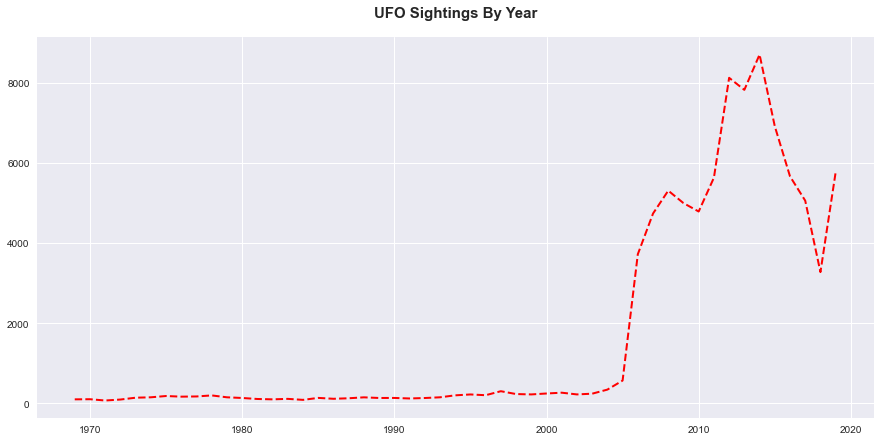

In [4]:
yearlySightings = ufos['date_time'].dt.year.value_counts().sort_index()

plt.figure(figsize=(15,7))
yearlySightings.plot(color = 'red', linewidth=2, linestyle = 'dashed')
plt.title('UFO Sightings By Year', fontsize= 15, fontweight = 'bold', pad = 20)

While the graph above includes the years before 2005, the graph below shows the years after 2005. We will only analyse UFO sightings after this year, since it is more reliable to do so.

Text(0.5, 1.0, 'UFO Sightings after 2005 (Website Launch)')

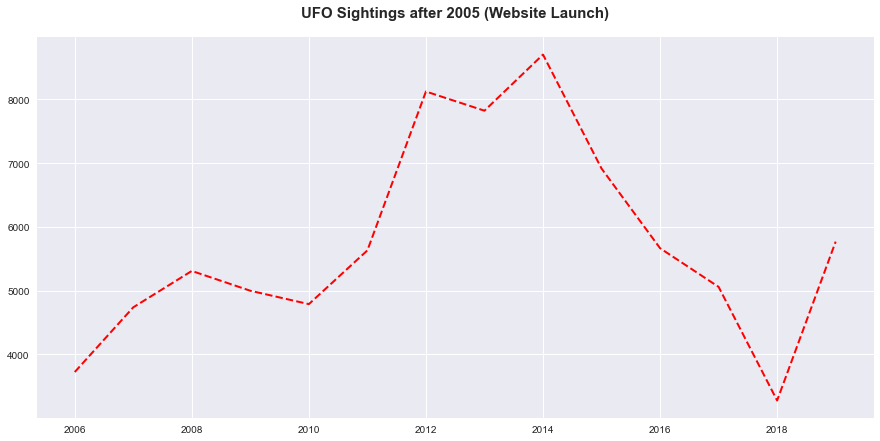

In [5]:
filtered = ufos['date_time'].dt.year > 2005
ufosfiltered = ufos[filtered]
value = ufosfiltered['date_time'].dt.year.value_counts().sort_index()

ufos = ufos[filtered]

plt.figure(figsize=(15,7))
value.plot(color = 'red', linewidth=2, linestyle = 'dashed')
plt.title('UFO Sightings after 2005 (Website Launch)', fontsize= 15, fontweight = 'bold', pad = 20)

Text(0.5, 1.0, 'UFO Sightings By State')

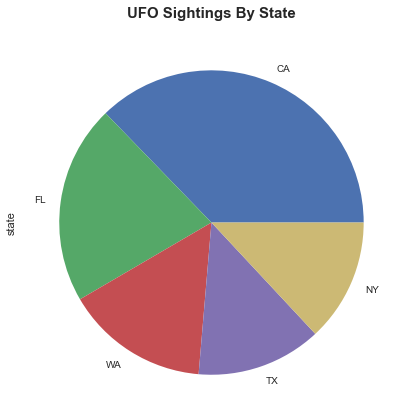

In [6]:
plt.figure(figsize=(10,7))
ufos['state'].value_counts().head().plot(kind='pie')
plt.xticks(fontsize = 14, rotation = 0)
plt.title('UFO Sightings By State', fontsize= 15, fontweight = 'bold', pad = 15)

Why California, do you ask? Well, as seen from the pie chart above, most of the sightings that occurs in the US happens in the state of California. It may be completely obvious that Aliens love avocado and surfing. It may also be equally obvious that Aliens are suspicious of what Silicon Valley is up to nowadays. After all, those geeks might just invent something that'll tip the balance of the Universe in humankind's favor. It may be for the very simple reason that California is the most populous state in the US, hence more witnesses. Who knows? What we know for sure is that Aliens are head over heels for the state of California.

It should be worth noting that there are a significant number of sightings in the other states as well, but clearly not as much as California - let's therefore filter this dataset to california, and california only:

In [7]:
ufoCali = ufos['state'] == 'CA'
ufoCali = ufos[ufoCali] 

### Which city in California has the most sightings?
Let's Find out which Cities in California where sightings mostly occur

Text(0.5, 1.0, 'Cities in California with the Most Sightings')

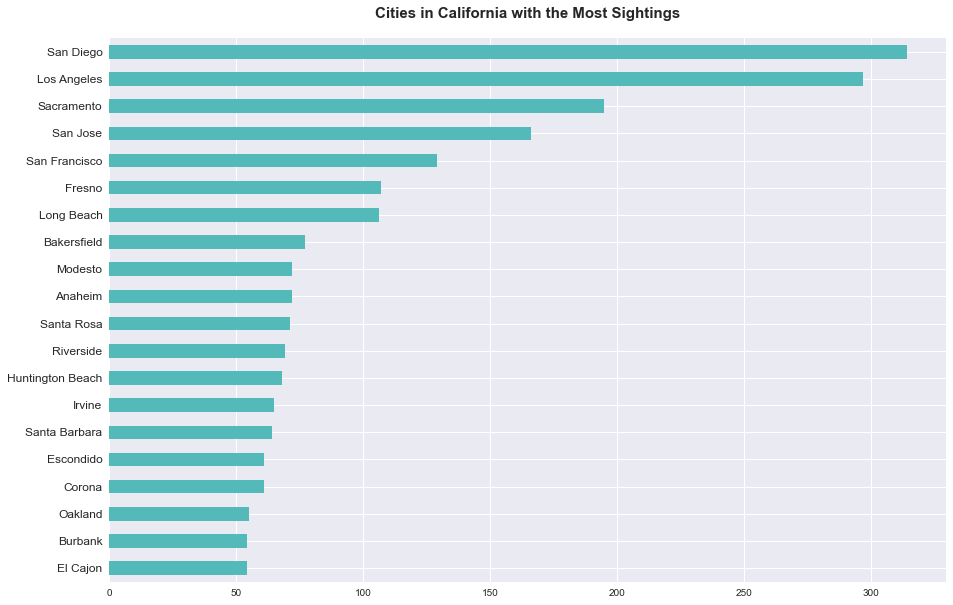

In [8]:
plt.figure(figsize=(15,10))
ufoCali['city'].value_counts().head(20).plot(kind='barh', color = '#54BAB9').invert_yaxis()
plt.yticks(fontsize = 12, rotation = 0)
plt.title('Cities in California with the Most Sightings', fontsize= 15, fontweight = 'bold', pad = 20)

The chart above is the top 20 cities in California where sightings occur the most. It seems that big cities like San Diego and Los Angeles get the lion's share of UFO sightings. It makes sense. Bigger populations equals more sightings. If i was an alien trying to entertain myself by messing around with a bunch of people, simultaneously, all at once, in one giant swoop, to cure my bad day, i'd go to these cities.

----------------------------------------------------------------------------------------------------------------------

## Time Analysis 

Let's find out the most popular timeframes to spot a UFO in California. We'll divide this section by hour, day, month, year, and finally find out the date which has the most sightings

Text(0.5, 1.0, 'UFO Sightings By Hour - California')

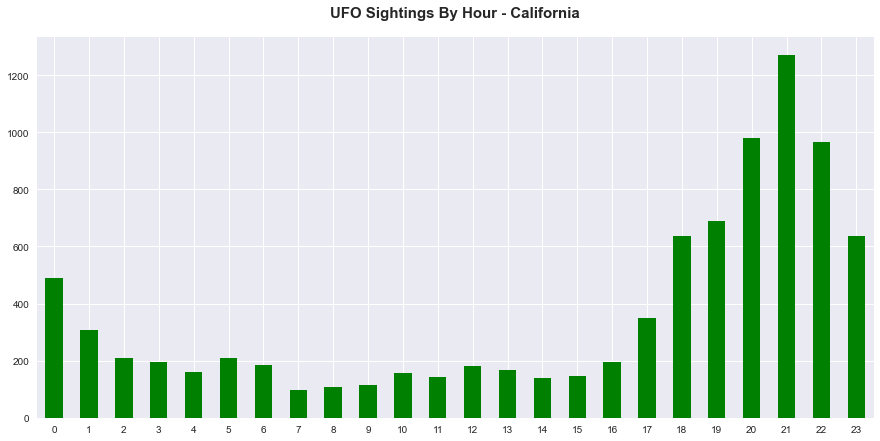

In [9]:
hourlySightings = ufoCali['date_time'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(15,7))
hourlySightings.plot(color = 'green', kind ='bar')
plt.xticks(fontsize = 10, rotation = 0)
plt.title('UFO Sightings By Hour - California', fontsize= 15, fontweight = 'bold', pad = 20)

9PM Seems to be the most popular time to spot a UFO, whilst 7AM is the least popular time. The number of sightings consistently rises between 15PM up until 9PM before dropping again. Of course, what kind of alien would show up at 7PM? Name me one alien movie where the alien shows up in the morning, eating Kellogs for breakfast? 

Text(0.5, 1.0, 'UFO Sightings By Day - California')

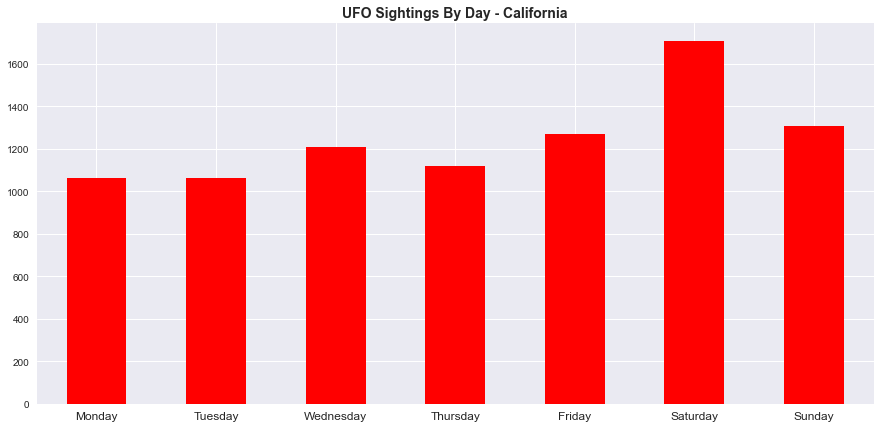

In [10]:
days_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

daySightings = ufoCali['date_time'].dt.weekday.value_counts().sort_index()
daySightings = daySightings.rename(days_dict)
plt.figure(figsize=(15,7))
daySightings.plot(kind='bar' , color= 'red')
plt.xticks(fontsize = 12, rotation = 0)
plt.title('UFO Sightings By Day - California', fontsize= 14, fontweight = 'bold')

Aliens love Weekends (Saturday scoring the highest), and hate weekdays (Monday and Tuesday scoring the lowest). Seems that the Aliens in California love to bother people during their time off. On a serious note, people are also more likely to go out during the weekends to say, go for a walk on the beach or a hike - which is where UFO sightings usually occur. 

Text(0.5, 1.0, 'UFO Sightings By Month - California')

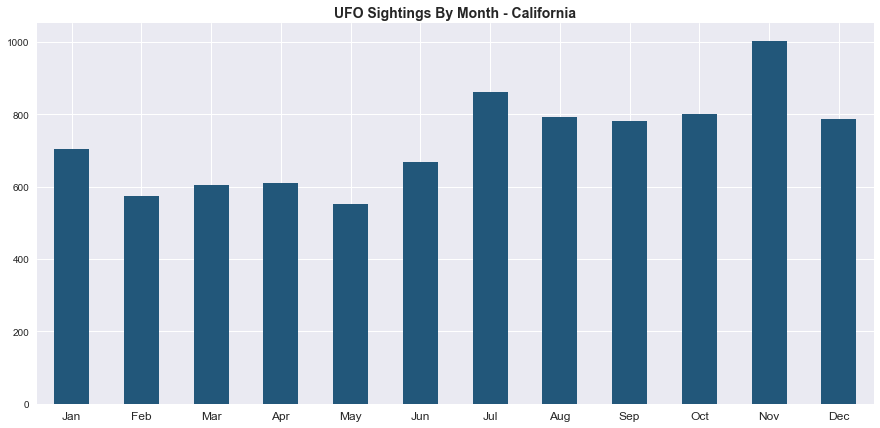

In [11]:
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
               7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

monthlySightings = ufoCali['date_time'].dt.month.value_counts().sort_index()
monthlySightings = monthlySightings.rename(months_dict)

plt.figure(figsize=(15,7))
monthlySightings.plot(kind='bar', color = '#22577a')
plt.xticks(fontsize = 12, rotation = 0)
plt.title('UFO Sightings By Month - California', fontsize= 14, fontweight = 'bold')

The trend line seems to be inconsistent. It looks like more sightings happen during the warmer months, but hold on - what happened there in November? Keep reading because later on, in the section titled 'Interesting questions we've come by so far' we will find out why November is the most popular month in the dataset! 

However, moving on, let's not be misled by the graph above. The graph below breaks month down by year (i only took a sample of the previous 6 years so it wouldn't take too much space for convenience). We can see that it paints quite a different picture. 

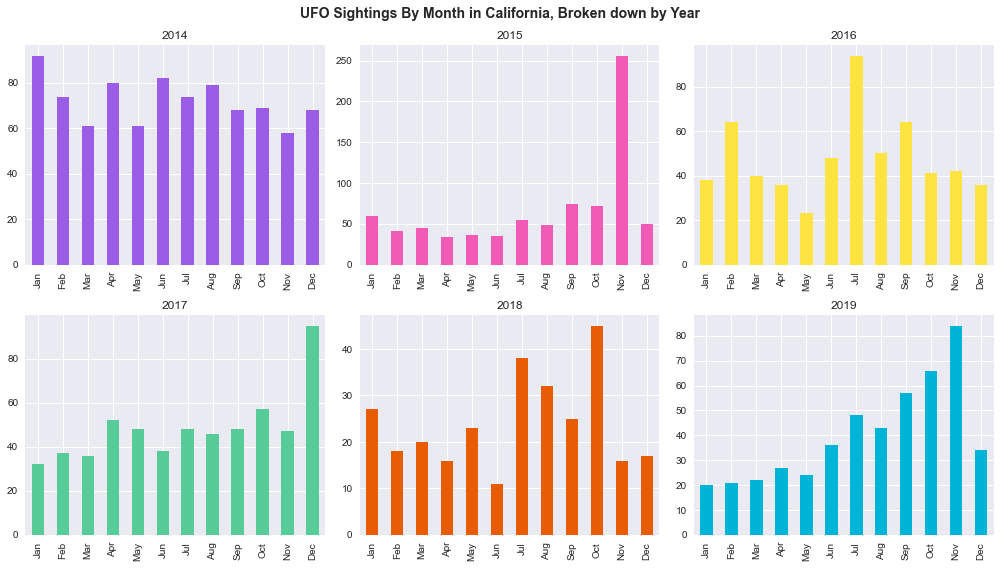

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("UFO Sightings By Month in California, Broken down by Year", fontsize= 14, fontweight = 'bold')
fig.tight_layout(pad=2)

ufoCali[ufoCali['date_time'].dt.year == 2014]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[0][0], title="2014",
                                                                                                                        color = "#9B5DE5")
ufoCali[ufoCali['date_time'].dt.year == 2015]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[0][1], title="2015",
                                                                                                                        color = "#F15BB5")
ufoCali[ufoCali['date_time'].dt.year == 2016]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[0][2], title="2016",
                                                                                                                        color = "#FEE440")
ufoCali[ufoCali['date_time'].dt.year == 2017]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[1][0], title="2017",
                                                                                                                        color = "#57cc99")
ufoCali[ufoCali['date_time'].dt.year == 2018]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[1][1], title="2018",
                                                                                                                        color = "#e85d04")
ufoCali[ufoCali['date_time'].dt.year == 2019]['date_time'].dt.month.value_counts().sort_index().rename(months_dict).plot(kind="bar", ax=axs[1][2], title="2019",
                                                                                                                        color = "#00b4d8")
plt.tight_layout()

Well what do you know? There's too much anomalies across the span of our 6 year sample for us to make sense of a clear trend. But the fact that it doesn't make sense, makes sense.... I think. I would assume that Aliens don't operate seasonally. Somehow i'm trying to fantasize martians having calendars in their spaceships, but to me that doesn't make sense. Anways. This research never intended to make any scientific, groundbreaking-journal-publishing-worthy type of sense in the first place.

That is not to say however, that just because nothing makes sense renders it uninteresting:
* Something was clearly going on in 2014. Each month had a mass of sightings, compared to the other years
* Throughout the years, we can see what i'd like to call **'peak months'** - months where suddenly there's a mass of sightings. Like November 2015, July 2016, December 2017 and so and so. These are months of interest clearly worthy for further investigation. 
* For the purposes of this *brief* research though, we'll return to November 2015 later in the article. 

----------------------------------------------------------------------------------------------------------------------

## Which Types of UFO's Are The Most Common?
Again, if you've seen the Alien movies, you'll know that Alien aircraft comes with a lot more variety than just your average Joe flying saucer shaped UFO. As you can see from the graph below, UFO's come in all shapes and sizes, but by far the most spotted type of UFO is 'light' - which unfortunately, in my opinion, is the most boring one on the list of UFO shapes. I mean, what even is a 'cigar' or 'cross 'UFO? 

Text(0.5, 1.0, 'Types of UFOs Spotted in California')

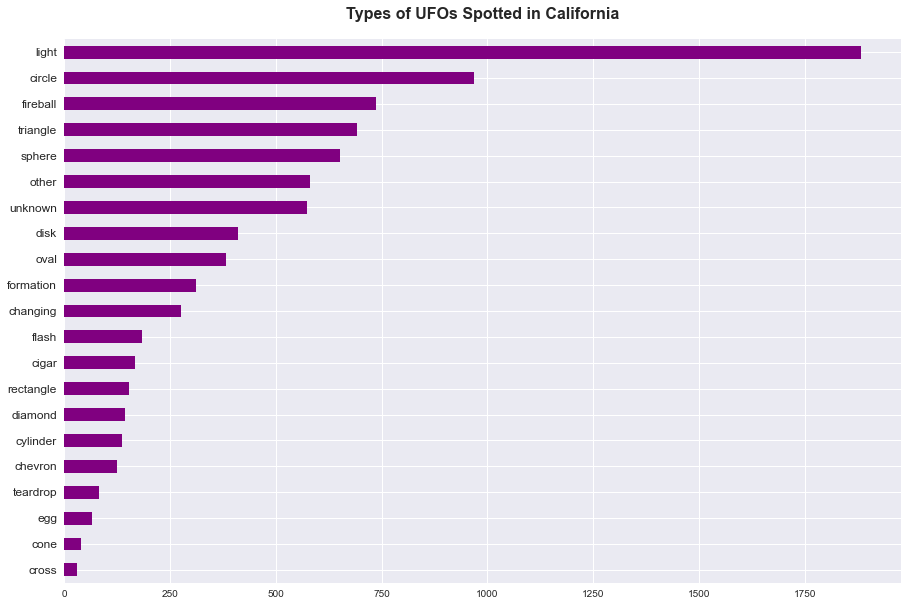

In [13]:
shapecount = ufoCali['shape'].value_counts()
plt.figure(figsize=(15,10))
shapecount.plot(kind = 'barh', color = 'purple').invert_yaxis()
plt.yticks(fontsize = 12, rotation = 0)
plt.title('Types of UFOs Spotted in California' , fontsize= 16, fontweight = 'bold', pad = 20)

Let's check out the number of light sightings on a trend line:

By doing this, it'll help us visualize how much more significant the light type is compared to the other types overtime. We'll take the other top 4 (circle, triangle, fireball and sphere) as a supporting benchmark

In [14]:
#Create Filter for each UFO Type
lightUFOfilter = ufoCali['shape'] == 'light'
lightUFO = ufoCali[lightUFOfilter]
lightUFOdate = lightUFO['date_time'].dt.year.value_counts().sort_index()

circleUFOfilter = ufoCali['shape'] == 'circle'
circleUFO = ufoCali[circleUFOfilter]
circleUFOdate = circleUFO['date_time'].dt.year.value_counts().sort_index()

triangleUFOfilter = ufoCali['shape'] == 'triangle'
triangleUFO = ufoCali[triangleUFOfilter]
triangleUFOdate = triangleUFO['date_time'].dt.year.value_counts().sort_index()

fireballUFOfilter = ufoCali['shape'] == 'fireball'
fireballUFO = ufoCali[fireballUFOfilter]
fireballUFOdate = fireballUFO['date_time'].dt.year.value_counts().sort_index()

sphereUFOfilter = ufoCali['shape'] == 'sphere'
sphereUFO = ufoCali[sphereUFOfilter]
sphereUFOdate = sphereUFO['date_time'].dt.year.value_counts().sort_index()

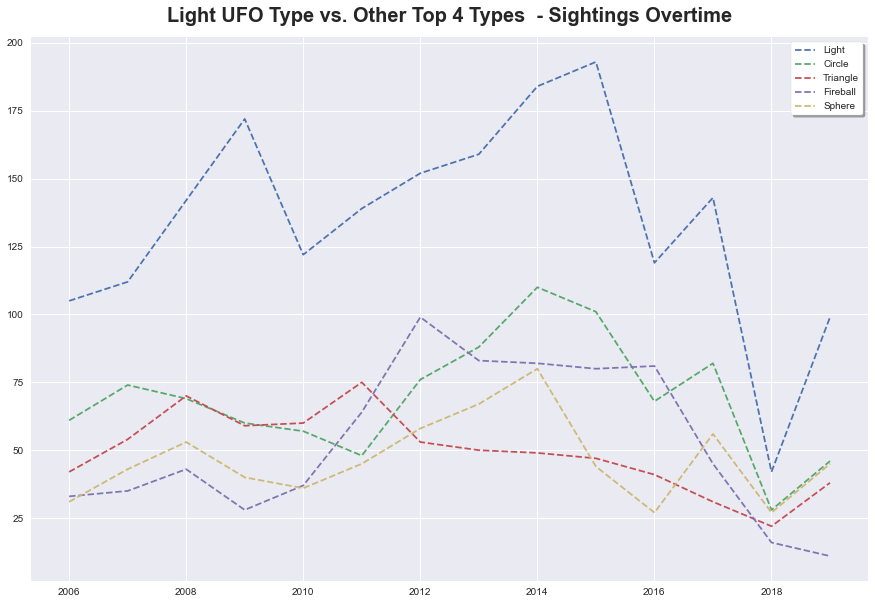

In [15]:
#Plot the Graph
plt.figure(figsize=(15,10))

lightUFOdate.plot(label = 'Light', linestyle = 'dashed')
circleUFOdate.plot(label = 'Circle', linestyle = 'dashed')
triangleUFOdate.plot(label = 'Triangle', linestyle = 'dashed')
fireballUFOdate.plot(label = 'Fireball', linestyle = 'dashed')
sphereUFOdate.plot(label = 'Sphere', linestyle = 'dashed')

plt.title('Light UFO Type vs. Other Top 4 Types  - Sightings Overtime', fontsize = 20, fontweight = 'bold', pad = 15)
plt.legend(loc = 'best', frameon = True, shadow = True, facecolor = 'white')

There's a lot going on around here so let's break it down point by point:
* Recall that the website was launched in 2005 - every type rises from there, and peaks until 2008 - except for the light type which keeps on rising until 2009
* A sudden jump occurs for all types from 2010 onwards until 2014-15
* Sightings drop from 2016 onwards until 2018. I would assume this was because people were preoccupied with the election fiasco...



----------------------------------------------------------------------------------------------------------------------

## What's with the Month of November? Specifically, November 2015?
Ok now throughout the article you might have been thinking - Dammit let's cut to the chase and just find out the date and time which had the most sightings! 

Well, it turns out that the answer to this question relates to what we found earlier about that peculiar date - November 2015. You may interpret it yourself in the graph below:

Text(0.5, 1.0, 'The Date and Time Which Had The Most Sightings')

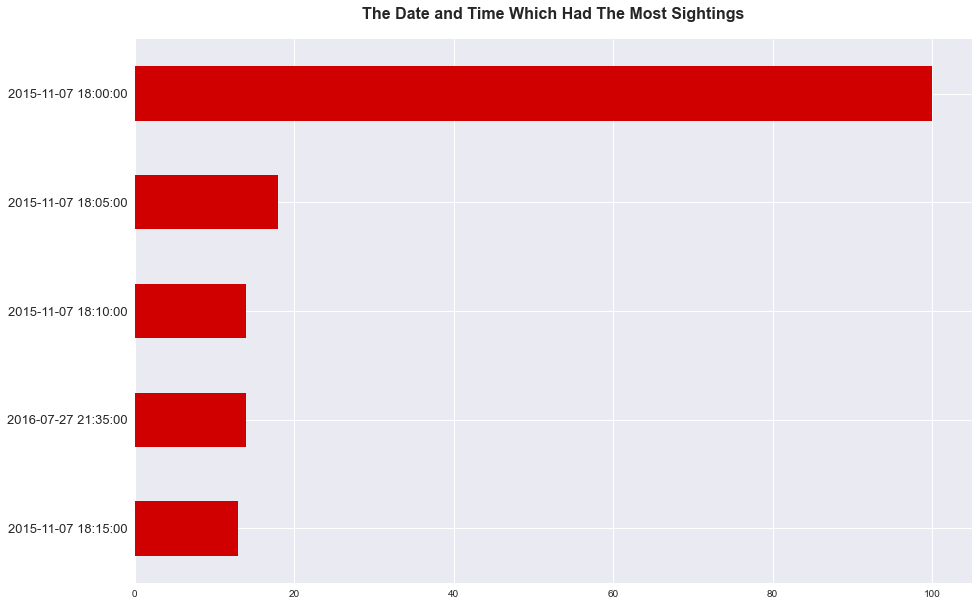

In [16]:
plt.figure(figsize=(15,10))
ufoCali['date_time'].value_counts().head(5).plot(kind='barh', color = "#d00000").invert_yaxis()

plt.yticks(fontsize = 13, rotation = 0)
plt.title('The Date and Time Which Had The Most Sightings' , fontsize= 16, fontweight = 'bold', pad = 20)

With a little help from our great oracle Google, we find that what happened during that day wasn't a UFO at all. Or so says the New York Times: https://www.nytimes.com/2015/11/13/us/bright-lights-strange-shapes-and-talk-of-ufos.html 

It turns out that the navy was testing out a new weapon:

"*After news reports, the Navy reluctantly confirmed it had been testing a Trident II (D5) missile fired from a submarine*" 

This apparently freaked out a lot of residents. Of course! I mean, look at that thing! How can you not infer it was an alien craft as an initial guess? Personally, I think this is somewhat acceptable. I don't blame human nature - we like to guess based on heuristics and tend not to be so good at waiting for an actual rational explanations. I mean, what else could be moving flickering my kitchen light at 12AM if it not were the spirit of the ancestors who used to dwell my house? Similarly, it's easy to infer that some bright light in the sky is a UFO after having seen Independence day, War of the Worlds, E.T, and so on and so forth.

Furthermore, even though in the minds of most people, the term "UFO" is almost always synonymous with Alien, this incident clearly shows otherwise. Personally though, I think refutations like these don't necessarily make the phenomena of UFO's any less interesting - who knows what mankind is *really* capable of technologically? Who knows, maybe the US or Chinese or Russian military might be hiding highly advanced aircraft? It doesn't have to necessarily be technological explanations either - maybe the UFO was a phenomena in nature, say, a shooting star or something. I don't know. I'm not a UFO expert :) 

----------------------------------------------------------------------------------------------------------------------

## Santa Barbara - A bonus for a person I know, who comes from Santa Barbara
Hello James. I hope that today, both your coffee is great and your wife and cats haven't been annoying you. Tell you what. It turns out your town isn't safe from UFO's. In fact, Santa Barbara - besides it being a beautiful town of about 100000 (a rather small population) still has quite a lot of UFO sightings - 64 in total. Why is this the case? The truth is, I don't know... I was sort of hoping you might have some ideas. If you want i can send you the full dataset only limited to the city of Santa Barbara. But anyways..

To make your life easier in this article i've:

* Pooled in a sample of 10 descriptions 
* Did the Time analysis like i did to the California Dataset above

### A Random Sample of 10 Descriptions, Alongside their Shape and Date:

In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
SBFilter = ufoCali['city'] == 'Santa Barbara'
ufoSB = ufoCali[SBFilter]
ufosummary = ufoSB[['city','text', 'date_time', 'shape']]
ufosummary.sample(10)

,city,text,date_time,shape
1519,Santa Barbara,"Abnormal flashing object in SoCal As an avid skywatcher since birth (51 hrs), I take pride in my recognition skills concerning flying objects. While relaxing on my back porch after a long day of work I noticed what appeared to be a flashing satellite. The trajectory was circumpolar and velocity was consistant with average satellites. The object was first noticed at the zenith. The first flash was of approximately -6 magnitude brightness and lasted 3 seconds. So far this seemed normal for a rotating solar paneled satellite. Every 22 seconds the object flashed at a consistent magnitude until it disappeared over the northern horizon. The odd thing is the flashing was consistent brightness as though the light was radiating all directions. Normal rotating satellites will flash at most twice before the change in orbital position relative to the observer makes the solar panels flash to a single spot on the earth's surface. The next flash would be hundreds of miles away from the observer one would think. This is the first time I’ve seen this phenomenon and have seen thousands of satellites in my skywatching. This is my 23rd unexplainable sighting of aerial phenomena. ((NUFORC Note: Witness elects to remain totally anonymous; provides no contact information. PD))",2019-08-06 20:45:00,flash
33389,Santa Barbara,"One Round circular pale orange object rising almost vertically to the South, then over us heading North. My friend and I happened to be out in the backyard when he remarked and pointed out dimly lit round object in the sky to the South. What was peculiar was it's flight pattern;as it was ascending nearly vertically at first,then headed towards, then almost directly over us, on a Northerly course,which we viewed through binoculars. Upon getting a closer view we both concurred that the object was round, a pale orange/yellowish color and no regular aircraft running lights appeared. We are both fairly skeptical middle aged men,sober and have aircraft experience ,possesing analytical and perceptive observational abilities. We both concurred that what we saw had to be a UFO. Regrettably no pictures were taken,but we both know what we observed an hour ago was not any kind of plane or type of aircraft either one of us have ever seen.",2011-11-26 20:45:00,disk
41872,Santa Barbara,"12 bright orange spheres moving slowly over the ocean in Santa Barbara, CA. My wife and I watched approximately 12 very bright orange spheres move slowly across the southern sky above the ocean in Montecito (Santa Barbara), CA. We live approximately 1/2 mile from the ocean so it was impossible to tell if they were close to shore or farther out to sea. Some moved horizontally while others moved diagonally upwards. I was easily able to observe all of the spheres with my binoculars as they were moving slowly with no herky jerky movements. In each case they simply vanished in the sky. There were no clouds or fog to obstruct my view. My father was a mathematician/physicist at the Jet Propulsion Lab (JPL) in Pasadena, CA., so I grew up with a great telescope looking up at the sky.",2012-08-18 21:00:00,circle
84742,Santa Barbara,A circular object was videoed hovering over the ocean off the Santa Barbara coast. Witnessed the object for about 10-15 minutes before it was videotaped. Video lasted for 1 minute.,2019-02-08 13:00:00,cylinder
22771,Santa Barbara,"My boyfriend and I were riding our bikes along the oceanfront heading east along the Santa Barbara coastline around 9pm when we stopped for a moment on the adjoining grass to talk, I was speaking to him when he first saw movement in the sky, he told me he saw a diamond/triangle shaped craft flying over us, I thought he was being funny and didn’t look up but then realized by the look on his face that he wasn’t joking. We had already witnessed two orange orbs in the same area about a month ago so I looked up and a few seconds later I saw one for myself except it was a “boom

### Most Popular UFO shapes in Santa Barbara

Text(0.5, 1.0, 'Types of UFOs Spotted in Santa Barbara, California')

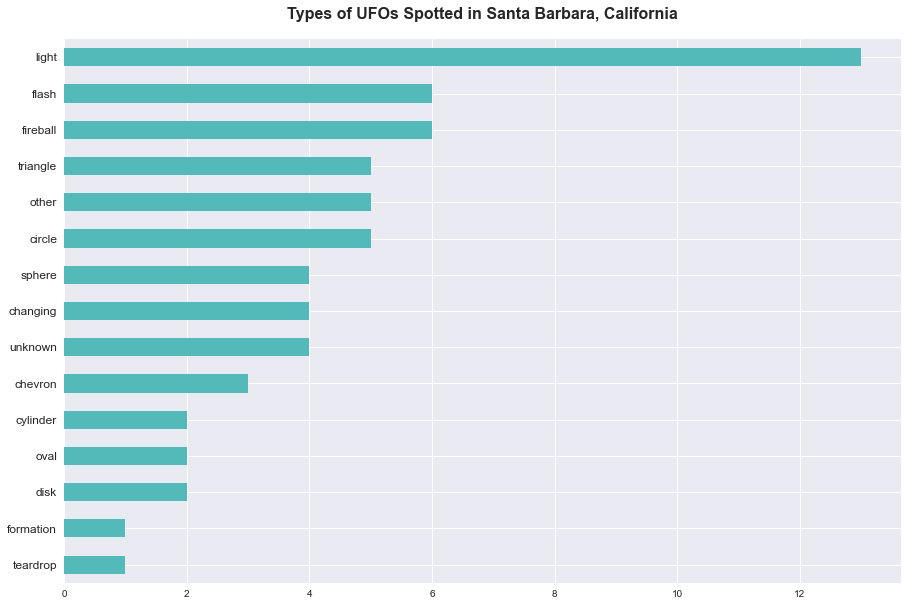

In [19]:
shapecount = ufoSB['shape'].value_counts()
plt.figure(figsize=(15,10))
shapecount.plot(kind = 'barh', color = '#54BAB9').invert_yaxis()
plt.yticks(fontsize = 12, rotation = 0)
plt.title('Types of UFOs Spotted in Santa Barbara, California' , fontsize= 16, fontweight = 'bold', pad = 20)

The usual culprit, light shaped UFO's again. There are a few fireball sightings, which is pretty interesting.

### Santa Barbara Time Analysis 

Text(0.5, 1.0, 'UFO Sightings By Hour - Santa Barbara, California')

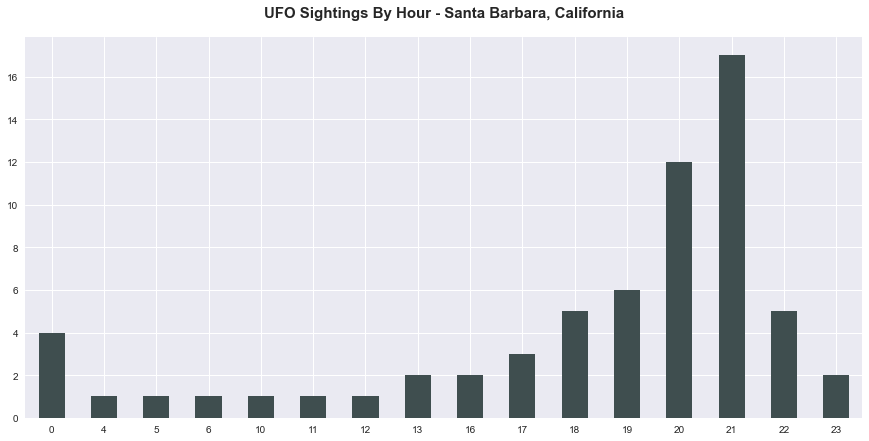

In [20]:
hourlySightings = ufoSB['date_time'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(15,7))
hourlySightings.plot(color = '#3F4E4F', kind ='bar')
plt.xticks(fontsize = 10, rotation = 0)
plt.title('UFO Sightings By Hour - Santa Barbara, California', fontsize= 15, fontweight = 'bold', pad = 20)

Text(0.5, 1.0, 'UFO Sightings By Day - Santa Barbara, California')

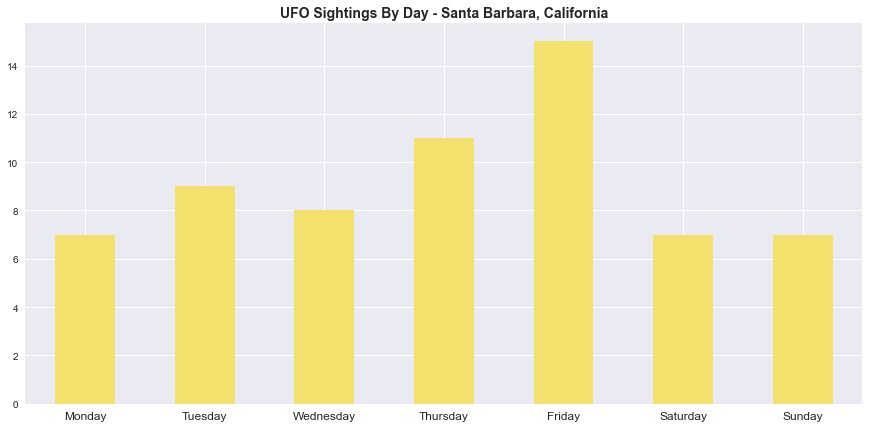

In [21]:
days_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

daySightings = ufoSB['date_time'].dt.weekday.value_counts().sort_index()
daySightings = daySightings.rename(days_dict)

plt.figure(figsize=(15,7))
daySightings.plot(kind='bar' , color= '#F4E06D')
plt.xticks(fontsize = 12, rotation = 0)
plt.title('UFO Sightings By Day - Santa Barbara, California', fontsize= 14, fontweight = 'bold')

Text(0.5, 1.0, 'UFO Sightings By Month - Santa Barbara, California')

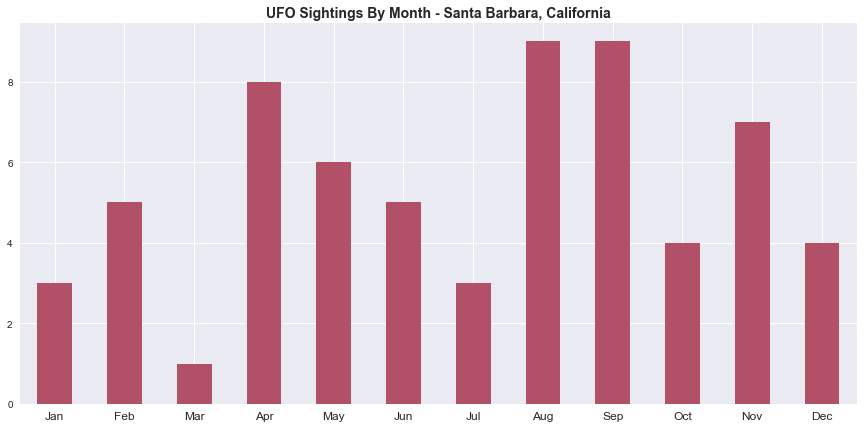

In [22]:
months_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
               7:"Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

monthlySightings = ufoSB['date_time'].dt.month.value_counts().sort_index()
monthlySightings = monthlySightings.rename(months_dict)

plt.figure(figsize=(15,7))
monthlySightings.plot(kind='bar', color = '#B25068')
plt.xticks(fontsize = 12, rotation = 0)
plt.title('UFO Sightings By Month - Santa Barbara, California', fontsize= 14, fontweight = 'bold')

So when is the best time to spot a UFO in Santa Barbara? Apparently either in August or September, on a Friday, at around 8 - 9PM! It's worth reminding that this dataset is meant to be descriptive and not inferential, so definitely nothing in the realm of predictions. Maybe the aliens will choose Santa Barbara as their first landing spot? Who knows?